## Demostrator 1
#### Purpose:
- In this example we create a custom catalogue to load CPOM's Cryosat Antarctic 1km DEM dataset

#### Comments:
- We recommend to create and activate the **intake_test.yaml**:
```
conda env create --file intake_test.yml
```
- Then to run the suggested environment in jupyter lab or notebook:
```
python -m ipykernel install --user --name intake_test
```    

#### TODO:
- Set further details in *args* and *metadata* in the catalogue
- For instance, we can set [chunks, storage_options (local or remote), etc](https://intake.readthedocs.io/en/latest/catalog.html)

#### Author: 
Alejandro Coca-Castro (The Alan Turing Institute)

## libraries

In [1]:
import intake
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from intake.config import conf
conf['cache_disabled'] = False

## create a custom catalog

In [3]:
%%writefile icenet2.yaml
sources:
    cryosat_dem:
      args:
        urlpath: "http://www.cpom.ucl.ac.uk/csopr/icesheets2/data/Antarctica_Cryosat2_1km_DEMv1.0.nc"
      description: "'A catalog for downloading Cryosat Antarctic 1km DEM from CPOM website"
      driver: intake_xarray.netcdf.NetCDFSource
      metadata: {}

Overwriting icenet2.yaml


## load and explore catalog

In [4]:
cat = intake.open_catalog('icenet2.yaml')

In [5]:
display(list(cat))

['cryosat_dem']

**NOTE:** If you don't have the data cached yet, then the next cell will take some minutes.

In [6]:
%%time
dem_netcdf  = cat['cryosat_dem'].to_dask()

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'zarr']. Consider explicitly selecting one of the installed backends via the ``engine`` parameter to xarray.open_dataset(), or installing additional IO dependencies:
http://xarray.pydata.org/en/stable/getting-started-guide/installing.html
http://xarray.pydata.org/en/stable/user-guide/io.html

## Explore

In [7]:
lat = dem_netcdf.coords['y'][:]
lon = dem_netcdf.coords['x'][:]
elevation = dem_netcdf.z[:,:]

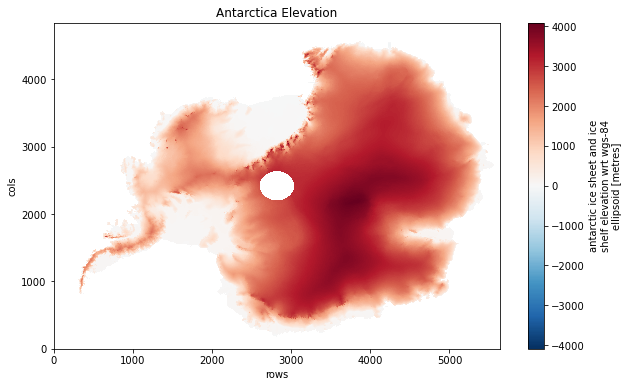

In [8]:
elevation.plot(figsize=(10, 6))
plt.title('Antarctica Elevation')
plt.show()